In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf


C:\Users\Anonymous\AppData\Local\Temp\ipykernel_8552\2551180754.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('datasets/INFY20002008.csv')
print(data)

      Unnamed: 0      Symbol Series         Date  Prev Close  Open Price  \
0              0  INFOSYSTCH     EQ  03-Jan-2000    14467.75    15625.00   
1              1  INFOSYSTCH     EQ  04-Jan-2000    15625.20    16800.00   
2              2  INFOSYSTCH     EQ  05-Jan-2000    16855.90    15701.00   
3              3  INFOSYSTCH     EQ  06-Jan-2000    15507.45    15256.65   
4              4  INFOSYSTCH     EQ  07-Jan-2000    14266.85    13125.50   
...          ...         ...    ...          ...         ...         ...   
2491        2491  INFOSYSTCH     EQ  23-Dec-2009     2502.40     2511.00   
2492        2492  INFOSYSTCH     EQ  24-Dec-2009     2583.75     2593.90   
2493        2493  INFOSYSTCH     EQ  29-Dec-2009     2591.80     2595.10   
2494        2494  INFOSYSTCH     EQ  30-Dec-2009     2577.15     2567.10   
2495        2495  INFOSYSTCH     EQ  31-Dec-2009     2580.00     2585.00   

      High Price  Low Price  Last Price  Close Price  Average Price  \
0       15625.20

In [4]:
data.columns
data1=data[['Last Price','Average Price','Close Price']].values
print(data1)

[[15625.2  15625.18 15625.2 ]
 [16875.25 16646.38 16855.9 ]
 [15507.45 15786.38 15507.45]
 ...
 [ 2576.8   2576.34  2577.15]
 [ 2576.    2594.45  2580.  ]
 [ 2604.7   2599.94  2601.1 ]]


In [5]:
scalar=MinMaxScaler()
x_data=scalar.fit_transform(data1)
print(x_data.shape)

(2496, 3)


In [24]:
xtrain,xtest=x_data[0:int(x_data.shape[0]*0.75),:],x_data[int(x_data.shape[0]*0.75):,:]
print(xtrain.shape,xtest.shape)
x_train,x_test=xtrain,xtest

(1872, 3) (624, 3)


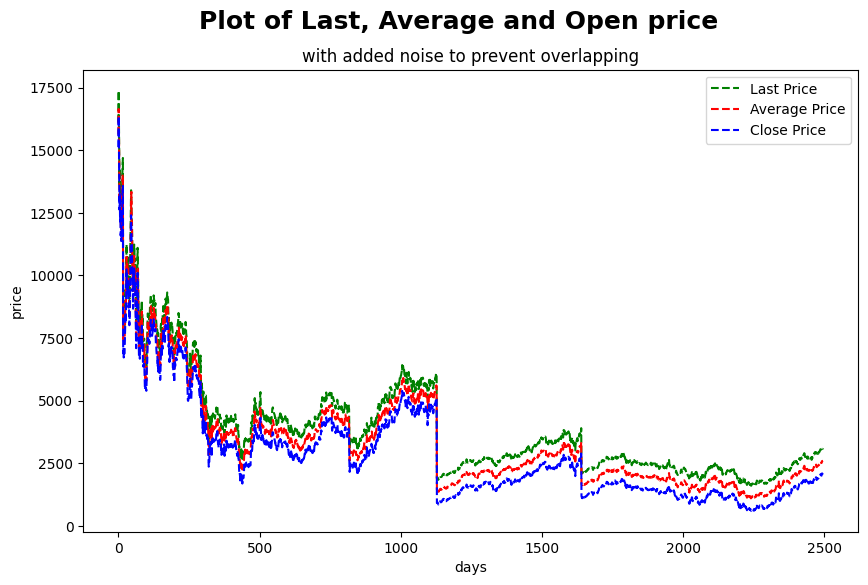

In [6]:
plt.figure(figsize=(10,6))
plt.plot(data1[:,0]+500,'--g',label='Last Price')
plt.plot(data1[:,1],'--r',label='Average Price')
plt.plot(data1[:,2]-500,'--b',label='Close Price')
plt.xlabel('days')
plt.ylabel('price')
plt.suptitle('Plot of Last, Average and Open price', fontsize=18, weight='bold')
plt.title('with added noise to prevent overlapping')
plt.legend()
plt.show()

In [27]:
#create datasets before building the model
def create_dataset(series,window):
    x_data,y_data=[],[]
    for i in range(0,len(series)-window-1):
        a=[]
        for j in range(window):
            a.append(series[[i+j],:])
        x_data.append(a)
        y_data.append(series[i+window,1])
    return(np.array(x_data),np.array(y_data))
window=50
xtrain,ytrain=create_dataset(xtrain,window)
xtest,ytest=create_dataset(xtest,window)

print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],3))
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],3))
print(xtrain.shape,xtest.shape)

(1821, 50, 1, 3) (1821,) (573, 50, 1, 3) (573,)
(1821, 50, 3) (573, 50, 3)


In [28]:
model=Sequential([
    keras.layers.LSTM(4,input_shape=(window,3)),
    keras.layers.Dense(1)
])
model.summary()
model.compile(loss='mean_squared_error',optimizer=tf.optimizers.Adam())
model.fit(xtrain,ytrain,epochs=5,batch_size=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 128       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1821/1821 [==============================] - 12s 6ms/step - loss: 0.0013
Epoch 2/5
1821/1821 [==============================] - 11s 6ms/step - loss: 3.7491e-04
Epoch 3/5
1821/1821 [==============================] - 11s 6ms/step - loss: 2.9700e-04
Epoch 4/5
1821/1821 [==============================] - 11s 6ms/step - loss: 2.7092e-04
Epoch 5/5
1821/1821 [==============================] - 11s 6ms/step - loss: 2.4281e-04


18/18 [==============================] - 0s 3ms/step


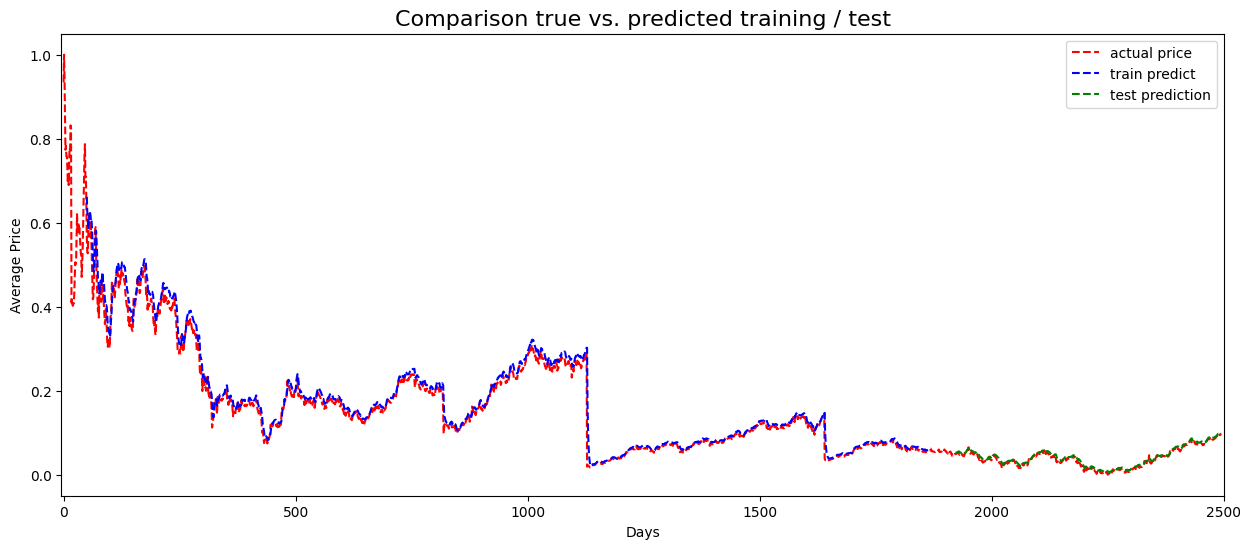

In [37]:
plt.figure(figsize=(15,6))
plt.plot(np.concatenate((x_train[:,1],x_test[:,1])),'--r',label='actual price')
plt.plot(range(window,len(xtrain)+window),model.predict(xtrain),'--b',label='train predict')
plt.plot(range(len(x_train)+window,len(x_test)+len(x_train)-1),model.predict(xtest),'--g',label='test prediction')
plt.xlabel("Days")
plt.ylabel("Average Price")
plt.title("Comparison true vs. predicted training / test", fontsize=16)
plt.legend()
plt.xlim(-5, 2500)
plt.show()